Data on mortality rates following surgery in 12 hospitals

Objective: use surgical mortality rates to asses each hospital's performance and identify whether any hospitals performs unusually well or poorly. 

In [1]:
library(INLA)

Loading required package: Matrix

Warning message:
"package 'Matrix' was built under R version 4.0.3"
Loading required package: sp

Warning message:
"package 'sp' was built under R version 4.0.3"
Loading required package: parallel

Loading required package: foreach

Warning message:
"package 'foreach' was built under R version 4.0.3"
This is INLA_20.03.17 built 2021-01-31 19:15:19 UTC.
See www.r-inla.org/contact-us for how to get help.



# Data

In [2]:
Surg

n   r  hospital
1   47  0 A       
2  148 18 B       
3  119  8 C       
4  810 46 D       
5  211  8 E       
6  196 13 F       
7  148  9 G       
8  215 31 H       
9  207 14 I       
10  97  8 J       
11 256 29 K       
12 360 24 L

* `n`: nums of operations carried out in each hospital in a one-year period.
* `r`: nums of deaths within 30 days of surgery in each hospital.
* `hospital`

# Model

$$Y_{i} \sim Binomial(n_{i}, p_{i}), \quad i = 1, \cdots, 12 $$
* $Y_i$: number of deaths in each hospital
* $p_i$: mortality rate

Assume mortality rates across hospitals are similar in some way, and specify a random effects model for the true mortality rates $p_i$:

$$
logit(p_{i}) = \alpha + u_{i}, \quad u_{i} \sim \mathcal{N}(0, \sigma^2)
$$

Non-informative prior for $\alpha$ (population logit mortality rate):
$$
\alpha \sim \mathcal{N}(0, 1/\tau),\quad \tau = 0
$$

The default prior for the precision of the random effects $u_i$ is:
$$
\frac{1}{\sigma^2} \sim Gamma(1.5\times10^{-5})
$$

We can change this prior by setting a Penalized Complexity (PC) prior on the standard deviation $\sigma$. For example, we can specify that the probability of $\sigma$ being greater than 1 is small equal to $0.01$: $P(\sigma > 1) = 0.01$. In INLA:

In [3]:
prior.prec <- list(prec = list(prior = "pc.prec",
                              param = c(1, 0.01)))

In [4]:
formula <- r ~ f(hospital, model = "iid",
                hyper = prior.prec)

In [5]:
res <- inla(formula,
           data = Surg, 
           family = "binomial", Ntrials = n,
           control.predictor = list(compute=TRUE),
           control.compute = list(dic=TRUE))

# Results

In [6]:
summary(res)


Call:
   c("inla(formula = formula, family = \"binomial\", data = Surg, Ntrials 
   = n, ", " control.compute = list(dic = TRUE), control.predictor = 
   list(compute = TRUE))" ) 
Time used:
    Pre = 1.97, Running = 0.272, Post = 0.104, Total = 2.34 
Fixed effects:
              mean   sd 0.025quant 0.5quant 0.975quant  mode kld
(Intercept) -2.545 0.14     -2.838   -2.539     -2.281 -2.53   0

Random effects:
  Name	  Model
    hospital IID model

Model hyperparameters:
                        mean    sd 0.025quant 0.5quant 0.975quant mode
Precision for hospital 12.04 18.30       2.37     8.29      41.86 5.34

Expected number of effective parameters(stdev): 7.26(1.70)
Number of equivalent replicates : 1.65 

Deviance Information Criterion (DIC) ...............: 74.93
Deviance Information Criterion (DIC, saturated) ....: 24.65
Effective number of parameters .....................: 8.17

Marginal log-Likelihood:  -41.16 
Posterior marginals for the linear predictor and
 the fitted value

In [7]:
plot(res)

In [8]:
plot(res, plot.prior=TRUE)

DIC:

In [9]:
res$dic$dic

[1] 74.92907

Summary of fixed effects (mean, std, 2.5, 50, 97.5 percentiles, mode of posterior, `kld`: Kullback & Leibler divergence.

In [10]:
res$summary.fixed

mean      sd        0.025quant 0.5quant  0.975quant mode     
(Intercept) -2.544512 0.1395919 -2.838162  -2.539243 -2.281235  -2.530075
            kld         
(Intercept) 1.157473e-05

In [11]:
res$summary.random

$hospital
   ID        mean        sd  0.025quant    0.5quant 0.975quant        mode
1   A -0.33064432 0.3626282 -1.16724939 -0.28596953  0.2653716 -0.19410309
2   B  0.34702270 0.2514905 -0.10974794  0.33460926  0.8719461  0.30619026
3   C -0.04082490 0.2594397 -0.57487713 -0.03561008  0.4648957 -0.02614529
4   D -0.21696795 0.1803479 -0.58148437 -0.21375316  0.1335648 -0.20486553
5   E -0.35153333 0.2639364 -0.92451957 -0.33125691  0.1098802 -0.28755904
6   F -0.05877123 0.2339900 -0.53735123 -0.05421722  0.3968686 -0.04450990
7   G -0.09776464 0.2517510 -0.62333856 -0.08892071  0.3832303 -0.07007383
8   H  0.54576636 0.2401124  0.10285403  0.53791260  1.0395490  0.52510604
9   I -0.04787712 0.2305901 -0.51707508 -0.04425923  0.4030557 -0.03665237
10  J  0.06129681 0.2663619 -0.46738229  0.05796179  0.6001563  0.04637350
11  K  0.34724179 0.2204066 -0.05764796  0.33791042  0.8050512  0.31834046
12  L -0.06756712 0.2051748 -0.48126861 -0.06525313  0.3355494 -0.05921388
            kld
1  1.127525e-04
2  9.304156e-05
3  3.912317e-06
4  4.982789e-05
5  8.498275e-05
6  5.748412e-06
7  7.259455e-06
8  4.888512e-04
9  5.109803e-06
10 1.171077e-06
11 1.352117e-04
12 6.587981e-06

In [12]:
res$summary.hyperpar

mean     sd       0.025quant 0.5quant 0.975quant
Precision for hospital 12.04279 18.29566 2.366042   8.292223 41.85589  
                       mode    
Precision for hospital 5.336638

Predicted mortality rates:

In [13]:
res$summary.fitted.values

mean       sd          0.025quant 0.5quant   0.975quant
fitted.Predictor.01 0.05668182 0.018726035 0.02284561 0.05595565 0.09584593
fitted.Predictor.02 0.10224683 0.021319426 0.06685635 0.10007343 0.14968683
fitted.Predictor.03 0.07220705 0.016947460 0.04229524 0.07103060 0.10923913
fitted.Predictor.04 0.06010513 0.007870117 0.04540425 0.05985757 0.07620672
fitted.Predictor.05 0.05410106 0.012981861 0.03041508 0.05356499 0.08086395
fitted.Predictor.06 0.07057638 0.014384221 0.04465265 0.06977715 0.10129430
fitted.Predictor.07 0.06837984 0.015450256 0.04061145 0.06751779 0.10148157
fitted.Predictor.08 0.12140184 0.022045963 0.08256291 0.12004266 0.16822830
fitted.Predictor.09 0.07122966 0.014196401 0.04563395 0.07043819 0.10153867
fitted.Predictor.10 0.07941516 0.019185679 0.04673869 0.07758816 0.12257376
fitted.Predictor.11 0.10159980 0.017226673 0.07156178 0.10035835 0.13865647
fitted.Predictor.12 0.06951273 0.011521320 0.04835710 0.06901296 0.09360915
                    mode      
fitted.Predictor.01 0.05534661
fitted.Predictor.02 0.09534974
fitted.Predictor.03 0.06919880
fitted.Predictor.04 0.05936109
fitted.Predictor.05 0.05244436
fitted.Predictor.06 0.06844269
fitted.Predictor.07 0.06620268
fitted.Predictor.08 0.11739480
fitted.Predictor.09 0.06909128
fitted.Predictor.10 0.07447969
fitted.Predictor.11 0.09776454
fitted.Predictor.12 0.06810758

Based on the `mean` columns: hospitals 2, 8, and 11 are the ones with the highest posterior means of the mortality rates. Columns `0.025quant` and `0.975quant` contain the lower and upper limits of $95\%$ credible intervals of the mortality rates and provide measures of uncertainty.

Poesterior distribution of parameter $\alpha$:

In [14]:
library(ggplot2)
alpha <- res$marginals.fixed[[1]]

Warning message:
"package 'ggplot2' was built under R version 4.0.3"


In [18]:
ggplot(data.frame(inla.smarginal(alpha)) + aes(x, y)) +
    geom_line() + theme_bw()

ERROR: Error: Base operators are not defined for quosures.
Do you need to unquote the quosure?

  # Bad:
  lhs + myquosure

  # Good:
  lhs + !!myquosure


In [16]:
alpha

x         y           
 [1,] -3.945097 3.105109e-10
 [2,] -3.665030 1.116198e-06
 [3,] -3.635084 2.025190e-06
 [4,] -3.516542 1.829634e-05
 [5,] -3.385190 1.648866e-04
 [6,] -3.384963 1.654843e-04
 [7,] -3.244929 1.385459e-03
 [8,] -3.239085 1.508173e-03
 [9,] -3.129668 7.076089e-03
[10,] -3.104896 9.943118e-03
[11,] -3.080441 1.386810e-02
[12,] -2.964862 6.419562e-02
[13,] -2.962334 6.633084e-02
[14,] -2.909809 1.296459e-01
[15,] -2.838162 3.111779e-01
[16,] -2.781239 5.950342e-01
[17,] -2.746514 8.578079e-01
[18,] -2.721158 1.100171e+00
[19,] -2.700562 1.328396e+00
[20,] -2.683137 1.541239e+00
[21,] -2.667921 1.739051e+00
[22,] -2.654240 1.923257e+00
[23,] -2.641641 2.095119e+00
[24,] -2.630254 2.249442e+00
[25,] -2.619504 2.391627e+00
[26,] -2.609177 2.522557e+00
[27,] -2.599629 2.636518e+00
[28,] -2.590218 2.740196e+00
[29,] -2.581321 2.828583e+00
[30,] -2.572529 2.905188e+00
[31,] ...       ...         
[32,] -2.506662 3.026584e+00
[33,] -2.498261 2.978019e+00
[34,] -2.489852 2.915522e+00
[35,] -2.481049 2.836135e+00
[36,] -2.472214 2.743302e+00
[37,] -2.462753 2.630917e+00
[38,] -2.453105 2.504591e+00
[39,] -2.442753 2.358535e+00
[40,] -2.431722 2.194103e+00
[41,] -2.420021 2.013761e+00
[42,] -2.406858 1.808645e+00
[43,] -2.392013 1.580797e+00
[44,] -2.374843 1.330087e+00
[45,] -2.354089 1.055373e+00
[46,] -2.325827 7.428355e-01
[47,] -2.281235 3.977970e-01
[48,] -2.225225 1.662346e-01
[49,] -2.184629 8.497535e-02
[50,] -2.124661 3.063037e-02
[51,] -2.090783 1.709807e-02
[52,] -2.050744 8.571250e-03
[53,] -1.984627 2.739601e-03
[54,] -1.958183 1.735698e-03
[55,] -1.844593 2.400526e-04
[56,] -1.828476 1.804833e-04
[57,] -1.706327 1.943889e-05
[58,] -1.704560 1.880189e-05
[59,] -1.592246 2.081766e-06
[60,] -1.424493 5.373884e-08
[61,] -1.144426 6.600394e-12

In [20]:
quant <- inla.qmarginal(0.05, alpha)
quant

[1] -2.781719

In [21]:
inla.pmarginal(quant, alpha)

[1] 0.05

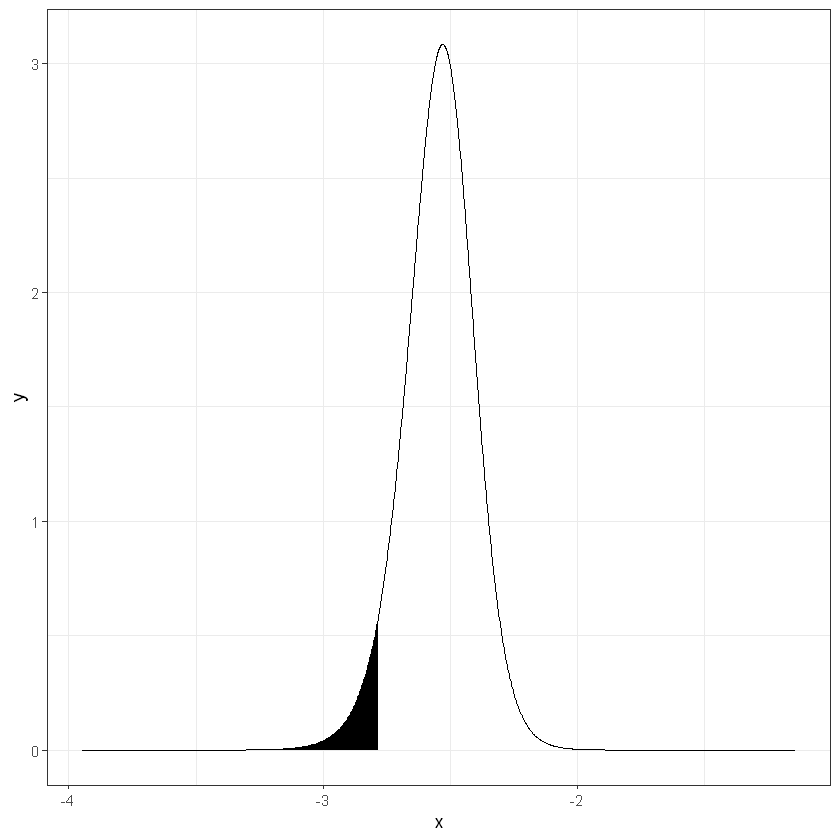

In [22]:
ggplot(data.frame(inla.smarginal(alpha)), aes(x, y))+
    geom_line() + 
    geom_area(data = subset(data.frame(inla.smarginal(alpha)),
                            x < quant),
              fill = "black") +
theme_bw()